<a href="https://colab.research.google.com/github/singh-damanpreet04/Machine_Learning/blob/main/Day25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means

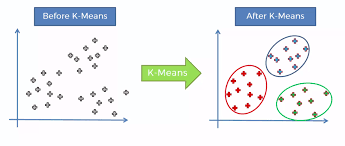



<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" width=600px>



In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhruvalpatel30/driver-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'driver-dataset' dataset.
Path to dataset files: /kaggle/input/driver-dataset


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [17]:
X = df.iloc[:, 1:]
X

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


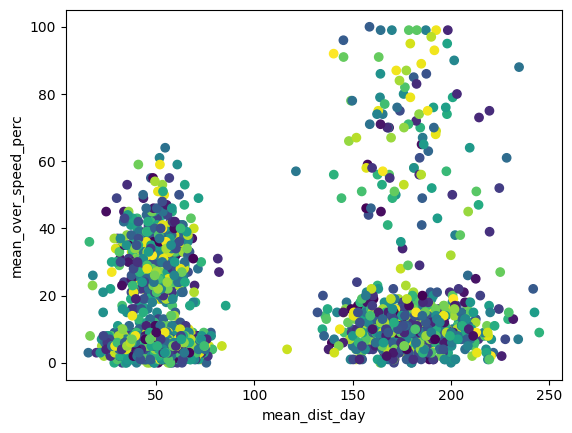

In [18]:
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['id'])
plt.show()

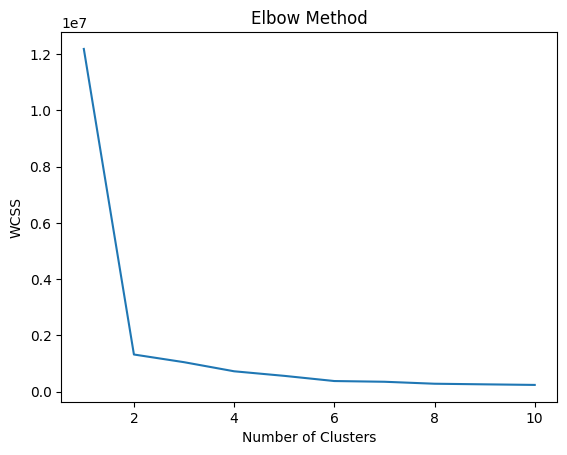

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

In [21]:
model = kmeans.fit(X)

In [22]:
model.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

In [23]:
labels = model.labels_
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [24]:
df['Cluster_labels'] = labels
df

,id,mean_dist_day,mean_over_speed_perc,Cluster_labels
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
...,...,...,...,...
3995,3423310685,160.04,10,0
3996,3423312600,176.17,5,0
3997,3423312921,170.91,12,0
3998,3423313630,176.14,5,0


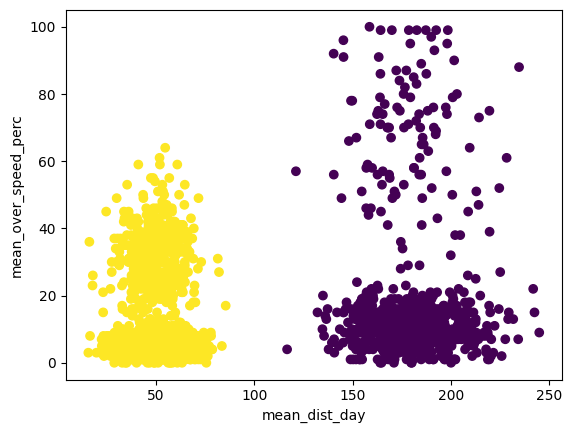

In [25]:
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster_labels'])
plt.show()